# Avanish Govekar

# MTH 337

# Project 5

# Introduction
<font size = "3">In the first part of the project, we will explore and study radioactive decay in the form of differential equations and its relationship with the amount of atoms, the half-life and decay constant. In the decay process, an unstable atomic nucleus transforms into a stable one by emitting electromagnetic energy and nuclear particles. The bulk decay rate, is in the form of the equation:

$\frac{dN}{dt}=-\lambda N$------------------------------------(1)

Where N is the number or population of atoms at a given time and $\lambda$ is the decay constant. A large value of the decay constant means that the sample decays quickly as the decay rate is very high. 

And the decay equation has an exact solution below:

$N = N_0e^{-\lambda t}$-----------------------------------(2)

Where $N_0$ is the initial population of the species and N is represented as a fraction. We shall investigate how the exact soluton can be used to derive the half life equation with half-life being the time required for a population to become half of the previous population. We will plot the equations using the Euler and RK4(Runge-Kutta) method. These methods will validate that the population does in fact halve after each time step interval and it has a geometric trend. We will also compare both the methods to see which is more accurate.The Runge-Kutta(RK) methods are a class of solvers studied and developed in the early 1900s by the German mathematicians C. Runge and M. W. Kutta. The RK methods are class of implicit and explicit iterative methods in numerical analysis, while the Euler method-a first-order numerical procedure used in solving ordinary differential equations and was developed by Leonhard Euler, a Swiss mathematician between 1768-1870.[2][3]

In the second part of the project, we will explore and study the Rossler equations-a system of differential equations with three parameters that will be used to manipulate the behavioral process of the equations in periodic and chaotic manners by using different values. By plotting these equations we will study how either of the parameters influence each other. Otto Eberhard Rössler, a German biochemist, known for his work on the chaos theory and the Rössler attraction-a theoretical equation developed these equations to be used to model chemical reaction.[4]<font>

In [1]:
import numpy as np
import numpy.matlib
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Part 1 - Radioactive decay

# 1.1

<font size = "4">The standard quantity used to characterize radioactive elements is called
the half-life. The half-life is defined in a specific manner. Half-life is defined as the time it takes the population to become half of the original population. Using Eq. 2Show that half-life can be calculated to be
$T_{1/2} =\frac{log2}{λ}$-----------------------------------------------------------------------(3)<font>

$N_0$ = initial number of atoms, $\lambda$ = decay constant, $t$ = amount of time passed and $T_{1/2}$ = half-life

Now, given: 

$N = N_0e^{-\lambda t}$



$\frac{N}{N_0} = e^{-\lambda t}$



$ln\frac{N}{N_0} = ln(e^{-\lambda t})$



$ln\frac{N}{N_0} = (-\lambda t)\,ln(e)$



$ln\frac{N}{N_0} = -\lambda t$



$ t = \frac{-ln(N \,/\, N_0)}{\lambda}$


$T_{1/2} = \frac{-ln(1/2)}{\lambda}$

Since $-ln(1/2) = ln(2) = 0.69314718056$

$T_{1/2} = \frac{ln(2)}{\lambda}$

Hence, the half-life, $T_{1/2}$, can be derived from the equation $N = N_0e^{-\lambda t}$ , where $T_{1/2} = \frac{ln(2)}{\lambda}$

# 1.2 
<font size = "4">Solve Eq. 1 using the Euler method and the RK4 method. Show that the
population after $T_{1/2}$ amount of time, is half of the starting population.
In fact, you should be able to see, that if you continue ahead in time, the
population at $2T_{1/2}$ is exactly half of the population at $T_{1/2}$ and so on.
In other words, if population is recorded after every $T_{1/2}$, you will get a
geometric progression.<font>

In [2]:
def radioactive(N=0.1, lamb = 0.1):
    """
    Function returns the output -lamb*N. 
    
    Keywords:
    x: Input. This is the population of the species. Can be concentration too so it is ok to input floats.
    lamb: Input. This is the decay constant. Note that lambda in python has a special meaning. So we name
          this variable lamb.
    output: returns -lamb*N.
    
    """
    
    return -lamb*N

In [3]:
def euler(func, h=0.1, yCurrent=0.1, *funcArgs):
    """
    Function performs one Euler step returns the value for the next iteration.
    
    Keywords:
    func: right hand side of the differential equation. 
          Default is the radioactivity function i.e. radioactive().

    h: Input. This is the time step used to the advance the solution to the next time point.
    yCurrent: Value of variable at current time step.
    *funcArgs: Parameters for the function in the differential equation.
    yNext: Output. Value of the variable at the next time step.
    
    """
    
    # Initialize
    yNext = 0.0
    
    # Calculate next time step
    yNext = h*func(yCurrent, *funcArgs) + yCurrent
    
    return yNext

In [4]:
numIter = 50
y = np.zeros((numIter,1))
y[0] = 50.0
h = 0.5
lamb = 1.0
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(y)):
    y[i] = euler(radioactive, h, y[i-1], lamb)

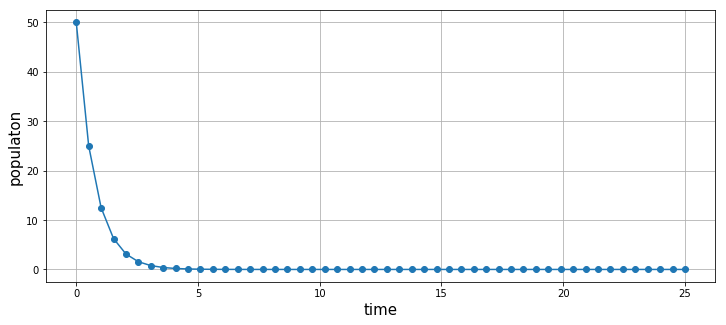

In [5]:
fig, axes = plt.subplots(figsize=(12, 5))

axes.plot(tList, y,  '.-', markersize=12)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('populaton', fontsize=15)
axes.grid(True)

<font size = "3">The plot based on the Euler method shows how the starting population is 50. Then, the populaton is 25 after a step. Then the following population is 6.5 and the subsequent population is half of that and so on. Hence the population is half of of the previous population every $T_{1/2}$ unit of time.<font>

<font size = "3"> Utilizing the same data used above for the RK4 function and keeping the same step-size, we do the following below.<font>

In [6]:
def rk4(func, h=0.1, yCurrent=0.1, *funcArgs):
    """
    Function performs one RK4 step returns the value for the next iteration.
    
    Keywords:
    func: right hand side of the differential equation. 
          Default is the radioactivity function i.e. radioactive().
    h: Input. This is the time step used to the advance the solution to the next time point.
    yCurrent: Value of variable at current time step.
    *funcArgs: Parameters for the function in the differential equation.
        
    yNext: Output. Value of the variable at the next time step.
    
    """
    
    # Initialize
    yNext = 0.0
    
    # Calculate k1, k2, k3 and k4
    
    k1 = func(yCurrent, *funcArgs)
    k2 = func(yCurrent + h*k1/2, *funcArgs)
    k3 = func(yCurrent + h*k2/2, *funcArgs)
    k4 = func(yCurrent + h*k3, *funcArgs)
    
    # Calculate next time step
    yNext = (h/6)*(k1 + 2*k2 + 2*k3 + k4) + yCurrent
    
    return yNext

In [7]:
numIter = 50
yRK4 = np.zeros((numIter,1))
yRK4[0] = 50.0
h = 0.5
lamb = 1.0
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yRK4)):
    yRK4[i] = rk4(radioactive, h, yRK4[i-1], lamb)

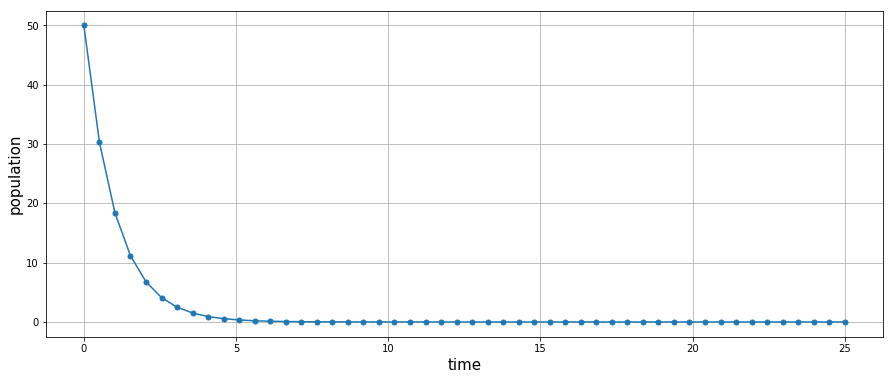

In [8]:
fig, axes = plt.subplots(figsize=(15, 6))

axes.plot(tList, yRK4, '.-', markersize=10)
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.grid(True)

Plotting Euler and RK4 methods on the same plot as exact solution of the equation $N=N_0e^{-\lambda t}$

(0, 15)

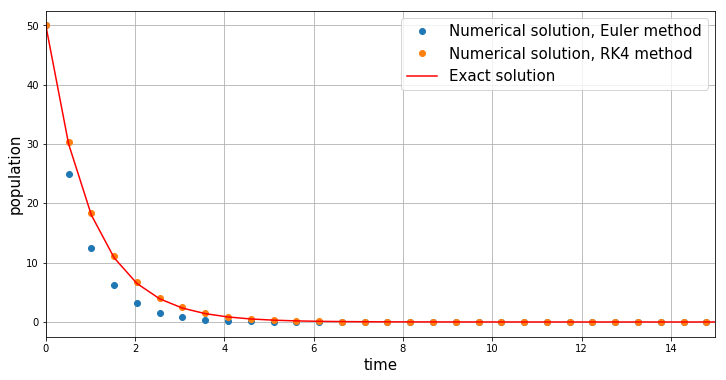

In [9]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(tList, y,  '.', markersize=12, label='Numerical solution, Euler method')
axes.plot(tList, yRK4,  '.', markersize=12, label='Numerical solution, RK4 method')
axes.plot(tList, y[0]*np.exp(-lamb*tList),'-', label='Exact solution', color='red')
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.grid(True)
plt.legend(fontsize=15)
axes.set_xlim(0, 15)
#axes.set_yscale('log')

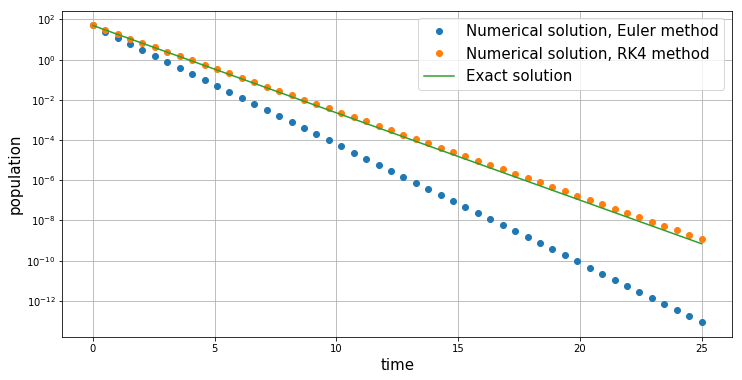

In [10]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(tList, y,  '.', markersize=12, label='Numerical solution, Euler method')
axes.plot(tList, yRK4,  '.', markersize=12, label='Numerical solution, RK4 method')
axes.plot(tList, y[0]*np.exp(-lamb*tList), '-', label='Exact solution')
axes.set_xlabel('time', fontsize=15)
axes.set_ylabel('population', fontsize=15)
axes.grid(True)
plt.legend(fontsize=15)
#axes.set_xlim([0, 2])
axes.set_yscale('log')

# 1.3
<font size="4">Compare the results from the Euler method and the RK4 method. Which
one is more accurate? Which is faster? Explore the effects of the step-size
on the algorithm accuracy with both methods. When comparing accuracy
and speed, remember that the comparison is best made when the step-size
is kept the same between the two algorithms.<font>

<font size ="3">Based on the plots of the Euler method and RK4 method for the step size h=0.5, we can see that the RK4 method performs accurately and is faster than the Euler method. Both the methods reach the expected value, however only the RK4 method is closer to it.<font> 

# Part 2 - R¨ossler equations and chaos
<font size = "4">The Rossler equations are a set of three coupled differential equations given by:

$\frac{dx}{dt}=-y-z$-------------------------------(4)

$\frac{dy}{dt}= x+ay$-------------------------------(5)

$\frac{dz}{dt}=b+z(x-c)$------------------------(6)
<font>

# 2.1
<font size = "4">There are three parameters to vary here. So there is a wide variety of
behavior to explore. The Wikipedia article lists the ranges of parameters
and is a good starting point. We will explore other ranges too.
Set a = b = 0.2. Then try out different values of c. You can start with
c = 2.5, 3.5, 4 and 5. You should be able to see period doubling and
transition to chaos by plotting y vs x at late time. You will need to plot
only the late time values since it takes time for the motion to converge to
the stable orbits. If you set a < 0 and set b = 0.2 and c = 5.7, you will
see that the system trajectory approaches on of the fixed points in Eq. 8.<font>

In [11]:
def Rosslereqns(X = np.array([0.0, 0.0, 0.0]), omega = np.array([0.2, 0.2, 2.5])):
    """
    Function returns the output vector for the Rossler equations.
    
    Keywords:
    X: Input. This is the vector of values in the Rossler equation
    omega: a, b, and c input parameters in the Rossler equations
    
    output: returns the vector containing the Rossler equations for the given omega (a, b, c) values.
    
    """
    
    # Initialize output
    xOut = np.zeros((len(X)))
    
    # Set the values
    xOut[0]=-X[1]-X[2]
    xOut[1]=X[0]+(omega[0]*X[1])
    xOut[2]=omega[1]+X[2]*(X[0]-omega[2])
    
    # Return output
    return xOut

In [12]:
def rk4(func, h=0.1, yCurrent = 0.1, *funcArgs):
    """
    Function performs one RK4 step returns the value for the next iteration.
    
    Keywords:
    func: right hand side of the differential equation. 
    h: Input. This is the time step used to the advance the solution to the next time point.
    yCurrent: Value of variable at current time step.
    *funcArgs: Parameters for the function in the differential equation.
        
    yNext: Output. Value of the variable at the next time step.
    
    """
    
    # Calculate k1, k2, k3 and k4
    
    k1 = func(yCurrent, *funcArgs)
    k2 = func(yCurrent + h*k1/2, *funcArgs)
    k3 = func(yCurrent + h*k2/2, *funcArgs)
    k4 = func(yCurrent + h*k3, *funcArgs)
    
    # Calculate next time step
    yNext = (h/6)*(k1 + 2*k2 + 2*k3 + k4) + yCurrent
    
    return yNext

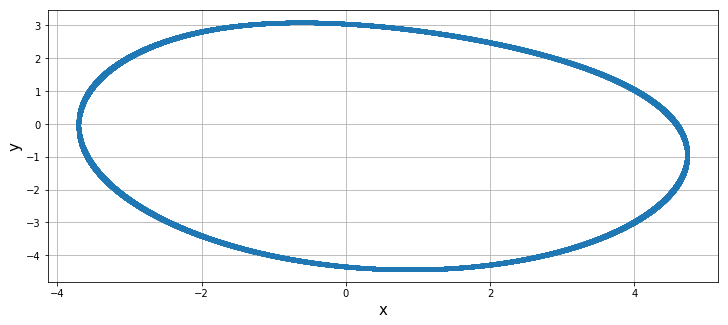

In [13]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([0.2, 0.2, 2.5])
tList = np.linspace(0, h*numIter, numIter)

for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
    
fig, axes = plt.subplots(figsize=(12, 5))

axes.plot(yrk4[40000:,0], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

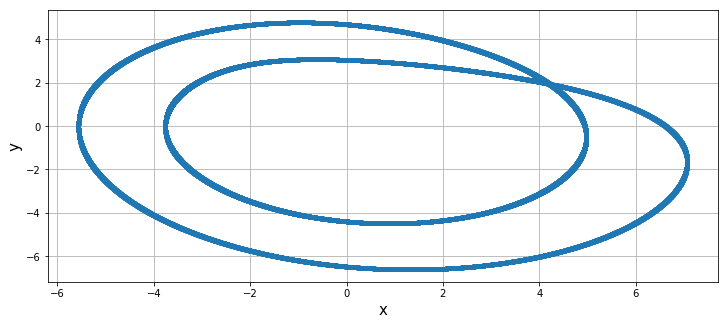

In [14]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([0.2, 0.2, 3.5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(yrk4[40000:,0], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

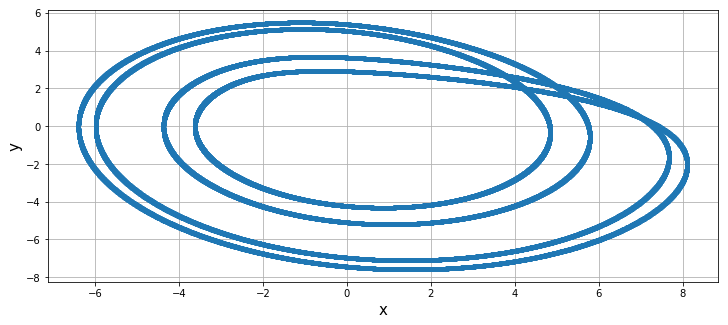

In [15]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([0.2, 0.2, 4])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(yrk4[40000:,0], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

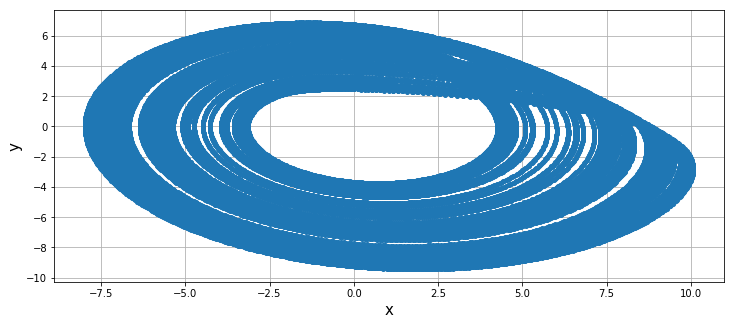

In [18]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([0.2, 0.2, 5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(yrk4[40000:,0], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

<font size = "3">Based on the plots in the above plots for values of c=2.5,3.5,4 and 5, we can observe that for c=5 the plot is chaotic while for the remaining c values, the plots are periodic.<font>

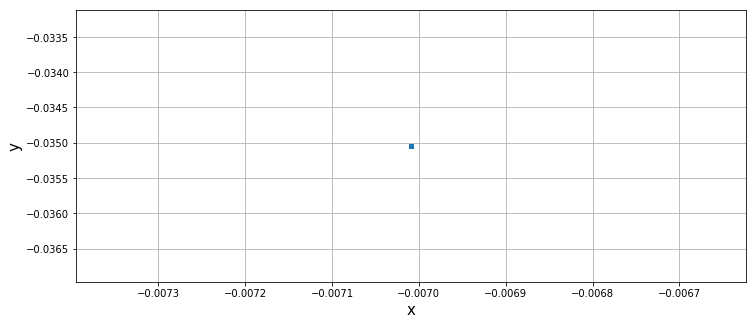

In [19]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([-0.2, 0.2, 5.7])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(yrk4[40000:,0], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.grid(True)

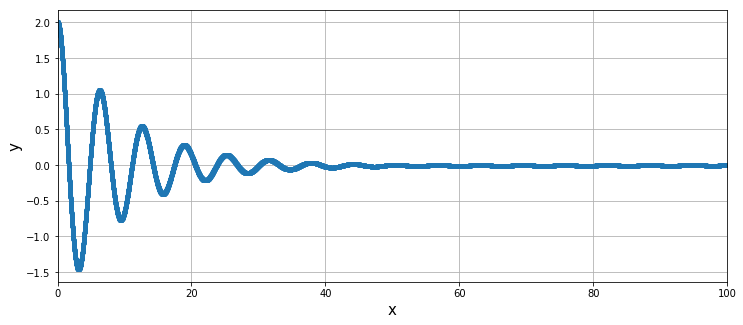

In [21]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([-0.2, 0.2, 5.7])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList, yrk4[:,0],  '.-', markersize=8)
axes.set_xlabel('x', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(0,100)
axes.grid(True)

<font size="3">Based on the two plots above, a < 0. The system trajectory, also according to the class notes approaches the point (0,0,0).<font>

# 2.2
<font size = "4">You can also plot the time series y vs t and x vs t and observe the different
trends in behavior based on the plots you see above. In the case of the
continuous time equations, analyzing time series is actually harder so it is
ok if you don’t see the periodicity right away.<font>

<font size = "3">The plots below displays the relationships between $x$ vs $t$ and $y$ vs $t$. The first four plots represent $x$ vs $t$ for the same $c$ = 2.5, 3.5, 4, and 5 as used in the previous problem. The last four plots represent $y$ vs $t$ for those same $c$ values as in the previous problem.<font>

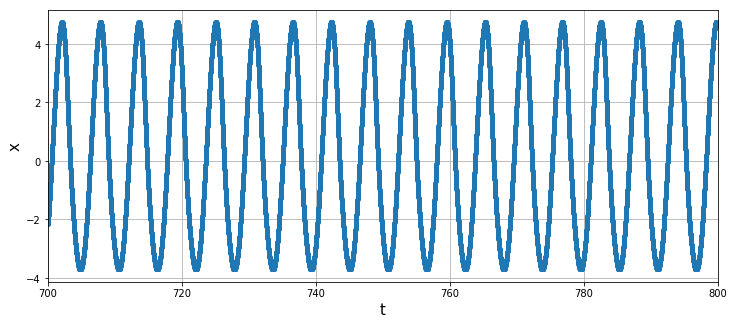

In [22]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([0.2, 0.2, 2.5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('x', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

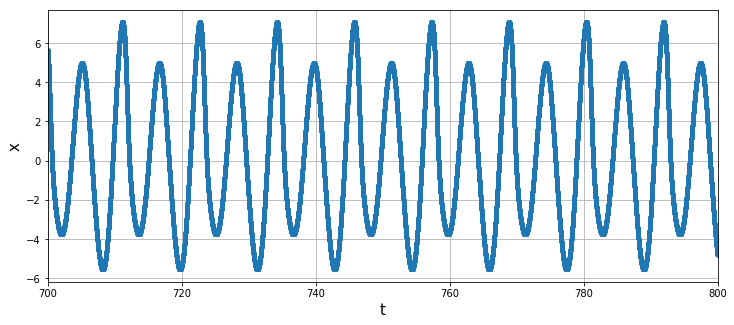

In [23]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = 0.01
omega = np.array([0.2, 0.2, 3.5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('x', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

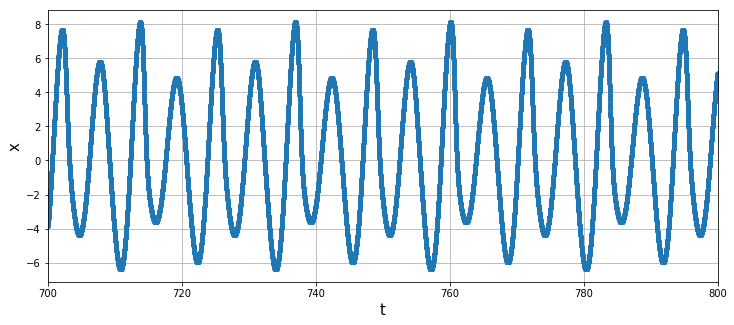

In [24]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 4])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('x', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

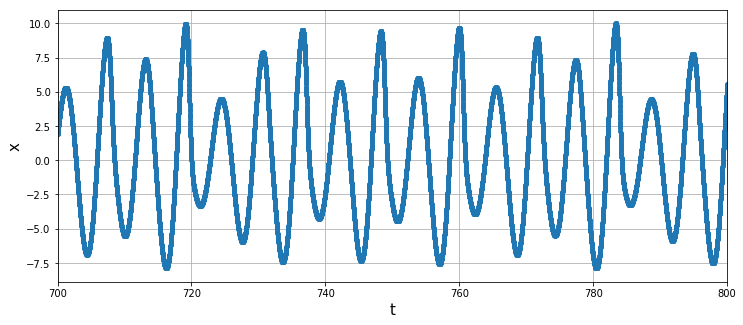

In [25]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,0],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('x', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

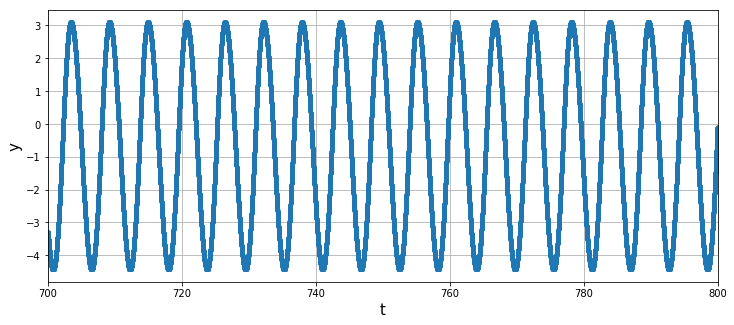

In [26]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 2.5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

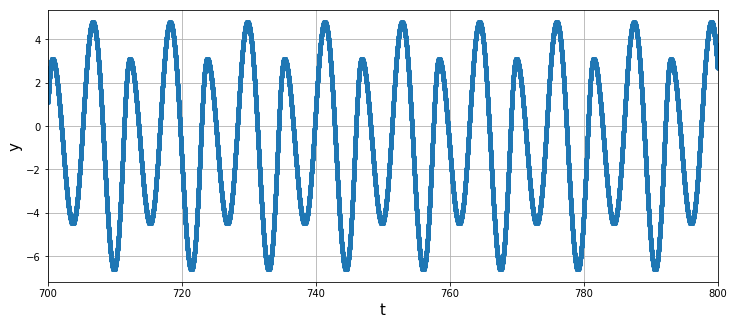

In [27]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 3.5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

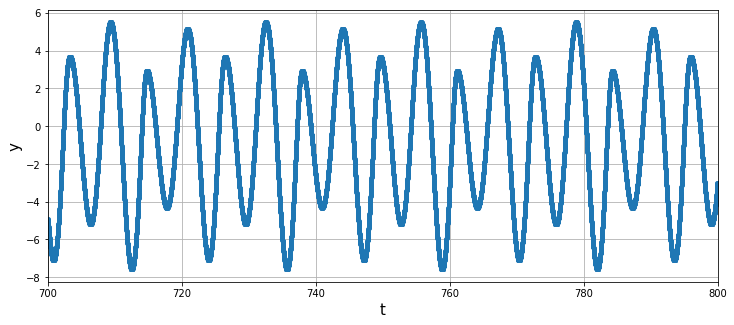

In [28]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 4])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

In [ ]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 5])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

In [ ]:
numIter = 80000
yrk4 = np.zeros((numIter,3))
yInit = 2.0
yrk4[0][0] = yInit
h = .01
omega = np.array([0.2, 0.2, 20])
tList = np.linspace(0, h*numIter, numIter)
for i in range(1, len(yrk4)):
    yrk4[i, :] = rk4(Rosslereqns, h, yrk4[i-1, :], omega)
fig, axes = plt.subplots(figsize=(12, 5))
axes.plot(tList[40000:], yrk4[40000:,1],  '.-', markersize=8)
axes.set_xlabel('t', fontsize=15)
axes.set_ylabel('y', fontsize=15)
axes.set_xlim(700, 800)
axes.grid(True)

<font size = "3">Based on the plots in this problem, we saw that the varying behavioural trends for the time series $x$ vs $t$ and $y$ vs $t$. Comparing them to the $x$ vs $y$ plots we also saw a similar behavior where the $c$= 2.5, 3.5 and 4 shows periodicity. When $c$=5, the plot displays a chaotic behavor which can be seen in the last plot where $c=20$ where no identifiable pattern is noticed.<font>

# Conclusion
<font size = "3">In a nutshell, we successfuly demonstrated all the main objectives of both the parts of the project.
In part 1, we discovered the following:
Deriving the half life equation $T_{1/2} = \frac{log2}{\lambda}$ from the radioactive decay equation's exact solution, $N = N_0e^{-\lambda t}$.Utilizing the Euler and RK4 methods to plot and understand radioactive decay. We concluded that the RK4 method is more closer to the exact solution and is more accurate than the Euler method-a higher error, despite the fact that both equations are fast and reach the correct values at some point in time. 

We also demonstrated how the Rossler equations function based on how their parameters influence each others behavior. After plotting the different equations based on different values of a and c, we noticed that for values of c ranging from 2.5 to 4 , the graphs of the plots displayed periodicity while for c=5 it displayed a chaoitic and aperiodic behavior. We finally compared x vs y values and times series for x vs t and y vs t values to further validate these graphical behavior trends in the plots.<font>

# References
[1] Class notes/professor Rahul Kashyap's notes

[2] https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

[3] https://en.wikipedia.org/wiki/Euler_method

[4] https://en.wikipedia.org/wiki/Otto_R%C3%B6ssler